In [3]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

tf.random.set_seed(42)

2.3.0
2.4.0


In [4]:
# load Fashion MNIST data
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(X_train_full.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [5]:
# split it into training and validation sets
# val: 5000, train: 55000
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

import numpy as np
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]
print(X_valid.shape, X_train.shape)


(5000, 28, 28, 1) (55000, 28, 28, 1)


In [6]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=32, kernel_size=3, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=64),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=10, activation='softmax'),
])

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="Adam", 
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [7]:
history = model.fit(X_train, y_train, epochs=30, 
                    batch_size=16,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
3438/3438 [==============================] - 25s 7ms/step - loss: 0.4472 - accuracy: 0.8370 - val_loss: 0.3222 - val_accuracy: 0.8786
Epoch 2/30
3438/3438 [==============================] - 26s 8ms/step - loss: 0.2853 - accuracy: 0.8961 - val_loss: 0.2664 - val_accuracy: 0.8984
Epoch 3/30
3438/3438 [==============================] - 24s 7ms/step - loss: 0.2449 - accuracy: 0.9095 - val_loss: 0.2283 - val_accuracy: 0.9152
Epoch 4/30
3438/3438 [==============================] - 24s 7ms/step - loss: 0.2123 - accuracy: 0.9219 - val_loss: 0.2354 - val_accuracy: 0.9154
Epoch 5/30
3438/3438 [==============================] - 26s 7ms/step - loss: 0.1922 - accuracy: 0.9287 - val_loss: 0.2143 - val_accuracy: 0.9186
Epoch 6/30
3438/3438 [==============================] - 26s 8ms/step - loss: 0.1729 - accuracy: 0.9350 - val_loss: 0.2155 - val_accuracy: 0.9188
Epoch 7/30
3438/3438 [==============================] - 24s 7ms/step - loss: 0.1575 - accuracy: 0.9404 - val_loss: 0.2270 - val_ac

In [8]:
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)

313/313 [==============================] - 1s 3ms/step - loss: 0.7467 - accuracy: 0.9115


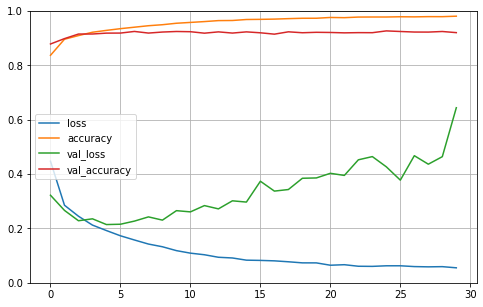

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [10]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=128, kernel_size=3, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=64),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=32),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=10, activation='softmax'),
])

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="Adam", 
              metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 32)          18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)              

In [11]:
history = model.fit(X_train, y_train, epochs=30, 
                    batch_size=16,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
3438/3438 [==============================] - 58s 17ms/step - loss: 0.4714 - accuracy: 0.8277 - val_loss: 0.3231 - val_accuracy: 0.8770
Epoch 2/30
3438/3438 [==============================] - 56s 16ms/step - loss: 0.3050 - accuracy: 0.8868 - val_loss: 0.2756 - val_accuracy: 0.8958
Epoch 3/30
3438/3438 [==============================] - 58s 17ms/step - loss: 0.2633 - accuracy: 0.9016 - val_loss: 0.2529 - val_accuracy: 0.9050
Epoch 4/30
3438/3438 [==============================] - 58s 17ms/step - loss: 0.2348 - accuracy: 0.9132 - val_loss: 0.2300 - val_accuracy: 0.9176
Epoch 5/30
3438/3438 [==============================] - 57s 17ms/step - loss: 0.2154 - accuracy: 0.9196 - val_loss: 0.2303 - val_accuracy: 0.9136
Epoch 6/30
3438/3438 [==============================] - 59s 17ms/step - loss: 0.1996 - accuracy: 0.9263 - val_loss: 0.2230 - val_accuracy: 0.9182
Epoch 7/30
3438/3438 [==============================] - 59s 17ms/step - loss: 0.1857 - accuracy: 0.9317 - val_loss: 0.2233 -

In [12]:
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)

313/313 [==============================] - 2s 6ms/step - loss: 0.4396 - accuracy: 0.9109


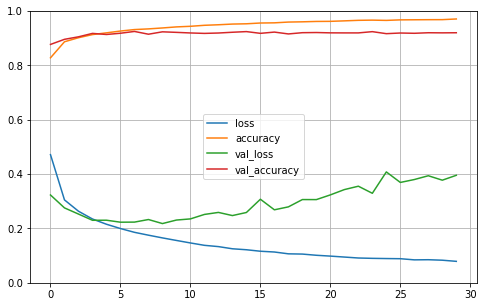

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()